# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D ,Dense

from keras.models import Sequential, Model
import IPython.display as ipd
import resampy
import glob

In [2]:
librosa.version.version

'0.10.1'

# Setting labels

In [3]:
MALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males"
FEMALE_DATA = "D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\females"

In [4]:
male_list = glob.glob(MALE_DATA + "\\*.wav")
female_list = glob.glob(FEMALE_DATA + "\\*.wav")

In [5]:
# merge male_list and female_list
mylist = male_list.copy()
mylist.extend(female_list)


In [6]:
print(male_list[100])
print(female_list[100])

D:\VoiceClone\OtherProject\VoxCeleb_gender\males\1088.wav
D:\VoiceClone\OtherProject\VoxCeleb_gender\females\1088.wav


In [7]:
type(male_list)

list

In [8]:
gender_list = []
for item in male_list:
    gender_list.append("male")
for item in female_list:
    gender_list.append("female")

In [9]:
labels = pd.DataFrame(gender_list)

In [10]:
labels[:10]

,0
0,male
1,male
2,male
3,male
4,male
5,male
6,male
7,male
8,male
9,male


# Getting the features of audio files using librosa

In [11]:
df =pd.DataFrame(columns=['feature'])
bookmark = 0

for index, y in enumerate(mylist):
    print(bookmark)
    X, sr = librosa.load(y, res_type='kaiser_fast', duration=2.75, sr=22050*2, offset=0.5)
    sr = np.array(sr)
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                         sr=sr,
                                         n_mfcc=13),
                    axis=0)
    features = mfccs
    df.loc[bookmark] = [features]
    bookmark=bookmark+1

0


2048
2.2675736961451248e-05
1
2048
2.2675736961451248e-05
2
2048
2.2675736961451248e-05
3
2048
2.2675736961451248e-05
4
2048
2.2675736961451248e-05
5
2048
2.2675736961451248e-05
6
2048
2.2675736961451248e-05
7
2048
2.2675736961451248e-05
8
2048
2.2675736961451248e-05
9
2048
2.2675736961451248e-05
10
2048
2.2675736961451248e-05
11
2048
2.2675736961451248e-05
12
2048
2.2675736961451248e-05
13
2048
2.2675736961451248e-05
14
2048
2.2675736961451248e-05
15
2048
2.2675736961451248e-05
16
2048
2.2675736961451248e-05
17
2048
2.2675736961451248e-05
18
2048
2.2675736961451248e-05
19
2048
2.2675736961451248e-05
20
2048
2.2675736961451248e-05
21
2048
2.2675736961451248e-05
22
2048
2.2675736961451248e-05
23
2048
2.2675736961451248e-05
24
2048
2.2675736961451248e-05
25
2048
2.2675736961451248e-05
26
2048
2.2675736961451248e-05
27
2048
2.2675736961451248e-05
28
2048
2.2675736961451248e-05
29
2048
2.2675736961451248e-05
30
2048
2.2675736961451248e-05
31
2048
2.2675736961451248e-05
32
2048
2.2675736961

In [12]:
df[:10]

,feature
0,"[-19.01939, -14.518488, -13.156489, -12.674267..."
1,"[-9.215574, -12.033152, -15.728947, -12.004335..."
2,"[-8.186507, -9.97141, -13.092442, -13.496811, ..."
3,"[-0.46758074, 0.20270208, -2.0973766, -3.20269..."
4,"[-13.162704, -10.461868, -11.16918, -10.951923..."
5,"[-5.112371, -4.9556127, -7.83437, -7.8922367, ..."
6,"[-9.733396, -9.19722, -10.885132, -10.898889, ..."
7,"[-19.04843, -17.818209, -19.24481, -18.701084,..."
8,"[-17.454939, -18.221704, -19.302172, -14.64333..."
9,"[-11.429747, -10.899648, -13.56437, -13.807048..."


In [13]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df = pd.concat([df3,labels], axis=1)
newdf = df.rename(index=str, columns={"0": "label"})
newdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,0
0,-19.019390,-14.518488,-13.156489,-12.674267,-12.923570,-12.048194,-12.785547,-17.591335,-19.742933,-19.067501,...,-15.244064,-15.739777,-15.671254,-15.278292,-15.500545,-12.699205,-12.015967,-11.521671,-8.660353,male
1,-9.215574,-12.033152,-15.728947,-12.004335,-11.546004,-12.381281,-12.951172,-14.391779,-14.133001,-14.151818,...,-10.221739,-10.168280,-9.721496,-9.418666,-8.137936,-8.528692,-6.902208,-4.053442,-6.572504,male
2,-8.186507,-9.971410,-13.092442,-13.496811,-13.497416,-14.792029,-14.029034,-13.313048,-13.434801,-14.375063,...,-10.358787,-10.634192,-10.879995,-11.195068,-11.745133,-11.972727,-14.117272,-14.453088,-16.271473,male
3,-0.467581,0.202702,-2.097377,-3.202695,-2.177437,-1.958218,-3.205921,0.459540,-2.363296,-1.234512,...,-2.302809,-3.165330,-5.143479,-9.652882,-13.208477,-17.087374,-17.235662,-15.130131,-11.633470,male
4,-13.162704,-10.461868,-11.169180,-10.951923,-11.857865,-12.367617,-9.528811,-6.713389,-7.206685,-10.410276,...,-13.847617,-13.282882,-14.740469,-15.388901,-12.879081,-12.428658,-13.783376,-13.994717,-13.804393,male
5,-5.112371,-4.955613,-7.834370,-7.892237,-9.387951,-7.760472,-6.490124,-7.463855,-7.544361,-6.586886,...,-12.125556,-10.560658,-9.875565,-12.514637,-12.455302,-10.682034,-11.912918,-14.249684,-13.406760,male
6,-9.733396,-9.197220,-10.885132,-10.898889,-10.867025,-11.372090,-10.724492,-10.271264,-10.469146,-11.021408,...,-11.931640,-10.570344,-11.002781,-11.207632,-10.696367,-10.502814,-9.482393,-9.870331,-9.986235,male
7,-19.048429,-17.818209,-19.244810,-18.701084,-18.440948,-20.209133,-19.826332,-20.328552,-19.542929,-17.897291,...,-16.090683,-15.246145,-16.714933,-17.973745,-19.657078,-19.423973,-18.625532,-17.406801,-13.927402,male
8,-17.454939,-18.221704,-19.302172,-14.643335,-12.324110,-9.182135,-9.901199,-9.814780,-7.677973,-8.033835,...,-15.876841,-13.040676,-12.445746,-11.196980,-11.113720,-7.349212,-7.737069,-8.197550,-7.879091,male
9,-11.429747,-10.899648,-13.564370,-13.807048,-13.195247,-12.180126,-10.879815,-10.295547,-10.005598,-11.550469,...,-7.762753,-7.810162,-7.865172,-8.929582,-9.379567,-9.750750,-9.694647,-9.720005,-7.483109,male


In [14]:
newdf.to_csv('D:/VoiceClone/GenderDetermination/newdf.csv')


In [15]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]
rnewdf=rnewdf.fillna(0)

# Dividing data into test set and train set

In [16]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [17]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,228,229,230,231,232,233,234,235,236,0
5780,-5.551312,-2.513380,-4.343353,-7.728561,-4.530926,-3.249290,-2.822454,-1.986874,1.147227,2.592970,...,-12.222100,-2.952652,6.495840,8.373257,5.203017,3.531706,0.722752,-1.333045,-2.526830,female
3176,-20.882481,-19.088453,-20.049877,-19.005096,-18.138016,-17.574793,-18.348751,-18.867077,-16.880592,-16.606953,...,-17.856083,-17.520721,-16.959923,-17.332737,-16.588575,-16.264221,-16.010660,-16.207882,-15.364851,male
5245,-11.764780,-15.182105,-23.246098,-24.944847,-25.959999,-25.111198,-25.510723,-22.017365,-21.658291,-23.085136,...,-22.855377,-22.234709,-21.942421,-21.400478,-22.690468,-23.838352,-28.020945,-26.317322,-25.369505,female
2798,-12.787505,-10.625558,-13.289016,-16.020538,-16.147335,-15.572039,-16.535872,-16.302238,-14.103943,-13.348486,...,-12.145223,-14.618637,-18.970171,-20.278017,-21.132261,-20.926464,-21.030333,-19.766817,-21.969921,male
820,-8.506082,-9.317863,-8.742301,-10.171510,-11.071788,-11.989709,-13.608346,-15.573302,-14.823669,-15.066706,...,-24.155434,-23.349976,-23.571495,-23.263132,-24.220490,-26.530935,-25.615408,-21.861807,-22.835375,male
4219,-8.010343,-11.407675,-14.325072,-15.243285,-14.633112,-14.378389,-16.783257,-17.969831,-20.732592,-24.240305,...,-23.920849,-24.760420,-25.708426,-25.446491,-24.737652,-24.284748,-24.352491,-26.302786,-25.342098,female
5831,0.134188,-0.880155,-5.743724,-2.701129,-1.344562,-1.174115,-1.791589,-3.020767,-1.404448,-2.440196,...,-3.872905,-4.609775,-2.930684,-2.780055,-4.010840,-4.460476,-3.985338,-4.217101,-5.400676,female
2542,-3.724227,-2.151531,-3.567653,-4.870296,-6.749789,-6.012477,-5.531698,-6.962300,-9.176807,-9.334083,...,-9.149852,-7.298084,-4.981339,-4.492561,-3.860408,-2.947214,-2.805501,-6.023763,-7.599066,male
2912,-18.633793,-17.110632,-8.466722,-4.889156,-4.429444,-4.445327,-4.875371,-5.591007,-4.828512,-4.599000,...,-9.071920,-9.667580,-14.479379,-14.546343,-14.423926,-16.567076,-16.912512,-15.234056,-13.762613,male
527,-25.393847,-23.982616,-25.894875,-26.531212,-26.836378,-24.665861,-22.544067,-20.667807,-20.327991,-22.209770,...,-26.235821,-25.750181,-25.840733,-26.709887,-26.191006,-26.099108,-23.976797,-22.836477,-20.147419,male


In [18]:
trainfeatures = train.iloc[:, :-1]
trainfeatures[:5]

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,236
3401,-11.885034,-9.594070,-5.777905,-6.149142,-8.324400,-6.716443,-7.240572,-7.369435,-5.900847,-7.906360,...,-7.473759,-6.862322,-7.651035,-9.710950,-8.322519,-7.455507,-7.385401,-6.832105,-7.216037,-8.138473
1319,-10.899898,-10.740762,-12.663095,-13.420264,-13.844491,-14.035460,-16.007149,-18.688038,-19.741800,-18.453568,...,-18.035780,-17.096851,-17.508213,-17.892164,-17.612644,-18.690376,-18.788912,-18.998232,-17.877615,-12.013808
2467,-23.299244,-22.573963,-18.867840,-18.582897,-23.658195,-23.549000,-23.425091,-21.524132,-13.664820,-9.328874,...,-13.276998,-14.002878,-15.478618,-16.632357,-19.810146,-23.816273,-24.736624,-25.147554,-26.552168,-26.355137
464,-6.362737,-8.194169,-15.121988,-15.642527,-14.997518,-15.413459,-17.393705,-17.609585,-17.751472,-17.172606,...,-19.222622,-20.122807,-19.016870,-19.382799,-19.757381,-19.350037,-19.033735,-18.460951,-20.582644,-17.664661
5565,-11.957792,-14.659089,-25.242964,-23.645285,-25.456820,-23.154696,-22.130892,-22.605883,-22.826488,-23.369040,...,-26.328136,-26.318970,-26.825310,-27.150906,-25.029263,-23.664442,-24.652626,-24.765432,-25.499132,-25.743168


In [19]:
trainlabel = train.iloc[:, -1:]
trainlabel[:5]

,0
3401,male
1319,male
2467,male
464,male
5565,female


In [20]:
testfeatures = test.iloc[:, :-1]

In [21]:
testlabel = test.iloc[:, -1:]

In [22]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
X_train.shape

(4836, 237)

# Create CNN model

In [24]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

# Building CNN

In [25]:
cnn = Sequential()

In [26]:
# First input layers
cnn.add(Conv1D(256, 3,padding='same', activation='relu', input_shape=(237,1)))
cnn.add(Conv1D(256, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(128, 3, padding='same', activation='relu'))
cnn.add(Conv1D(128, 3, padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(64, 3,padding='same', activation='relu'))
cnn.add(Conv1D(64, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(32, 3,padding='same', activation='relu'))
cnn.add(Conv1D(32, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(16, 3,padding='same', activation='relu'))
cnn.add(Conv1D(16, 3,padding='same', activation='relu'))
cnn.add(AveragePooling1D(pool_size=(2)))

cnn.add(Conv1D(8, 3,padding='same', activation='relu'))
cnn.add(Conv1D(8, 3,padding='same', activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=10, activation='sigmoid'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=2, activation='sigmoid'))
cnn.summary()
opt = keras.optimizers.RMSprop(learning_rate=1e-5, epsilon=1e-6)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 237, 256)          1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 237, 256)          196864    
                                                                 
 average_pooling1d (Average  (None, 118, 256)          0         
 Pooling1D)                                                      
                                                                 
 conv1d_2 (Conv1D)           (None, 118, 128)          98432     
                                                                 
 conv1d_3 (Conv1D)           (None, 118, 128)          49280     
                                                                 
 average_pooling1d_1 (Avera  (None, 59, 128)           0         
 gePooling1D)                                           

In [27]:
cnn.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

In [28]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Removed the whole training part for avoiding unnecessary long epochs list

In [29]:
cnnhistory=cnn.fit(x_traincnn, y_train, batch_size=32, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
152/152 [==============================] - 33s 189ms/step - loss: 0.6953 - accuracy: 0.5378 - val_loss: 0.6757 - val_accuracy: 0.6076
Epoch 2/100
152/152 [==============================] - 25s 164ms/step - loss: 0.6931 - accuracy: 0.5347 - val_loss: 0.6752 - val_accuracy: 0.6076
Epoch 3/100
152/152 [==============================] - 23s 152ms/step - loss: 0.6951 - accuracy: 0.5422 - val_loss: 0.6745 - val_accuracy: 0.6076
Epoch 4/100
152/152 [==============================] - 23s 151ms/step - loss: 0.6902 - accuracy: 0.5517 - val_loss: 0.6741 - val_accuracy: 0.6076
Epoch 5/100
152/152 [==============================] - 24s 158ms/step - loss: 0.6902 - accuracy: 0.5484 - val_loss: 0.6736 - val_accuracy: 0.6076
Epoch 6/100
  9/152 [>.............................] - ETA: 24s - loss: 0.6595 - accuracy: 0.6250

: 

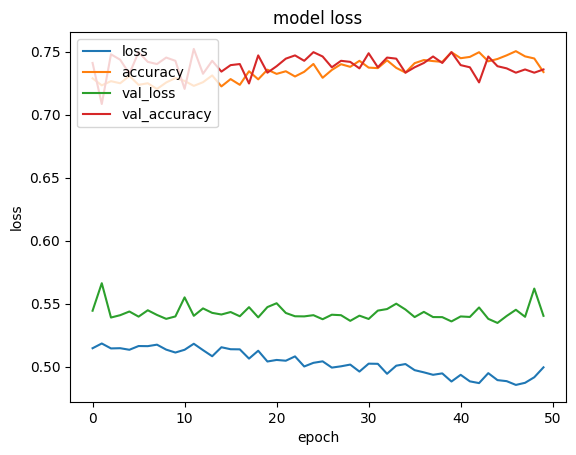

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_loss'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')
plt.show()

# Saving model

In [ ]:
import os
model_name = 'Gender_Detection_Model_v3.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
cnn.save(model_path)
print('Saved trained model at %s ' % model_path)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved trained model at d:\VoiceClone\GenderDetermination\saved_models\Gender_Detection_Model_v3.h5 


In [ ]:
import json
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Gender_Detection_Model_v3.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 73.58%


# Predict

In [ ]:
preds = loaded_model.predict(x_testcnn)
preds

37/37 [==============================] - 5s 89ms/step


array([[0.23111318, 0.48943537],
       [0.35660145, 0.3787602 ],
       [0.15293013, 0.593936  ],
       ...,
       [0.25968754, 0.46018735],
       [0.34037578, 0.39100665],
       [0.16697131, 0.571304  ]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)
preds1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
pred_flat = preds1.astype(int).flatten()
predictions = (lb.inverse_transform(pred_flat))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male
1,male
2,male
3,female
4,female
5,male
6,male
7,male
8,male
9,male


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male
1,female
2,male
3,female
4,female
5,male
6,male
7,male
8,male
9,male


In [ ]:
finaldf = actualdf.join(preddf)

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(actualdf, preddf)

0.7358490566037735

In [ ]:
val_acc = cnnhistory.history['val_accuracy']

In [ ]:
max(val_acc)

0.7521440982818604

In [ ]:
newdf[0]

,0,0
0,-19.019390,male
1,-9.215574,male
2,-8.186507,male
3,-0.467581,male
4,-13.162704,male
...,...,...
5988,-6.732637,female
5989,-22.649759,female
5990,-18.218863,female
5991,-17.195826,female


In [ ]:
labels[0][0]

'male'

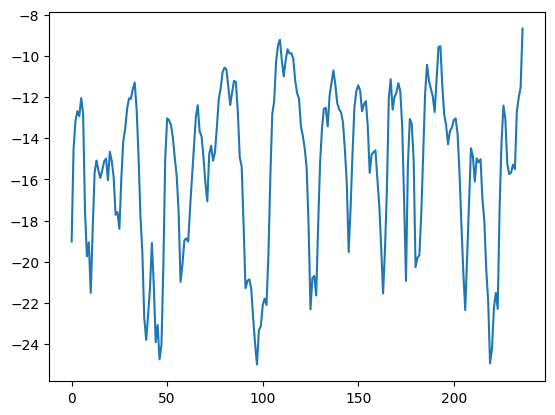

In [ ]:
df3.iloc[0]
plt.plot(df3.iloc[0])  


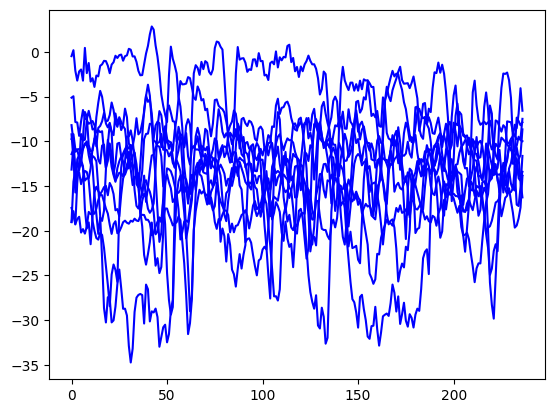

In [ ]:
for i in range(10):
    if labels[0][0]=="male":
        plt.plot(df3.iloc[i], color='blue')
    else:
        plt.plot(df3.iloc[i], color='red')
plt.show()

In [ ]:
wav_data, sr = librosa.load(male_list[0], sr=None, duration = 2.5, res_type='kaiser_fast')

In [ ]:
male_list[0]

'D:\\VoiceClone\\OtherProject\\VoxCeleb_gender\\males\\0.wav'

In [ ]:
sr

16000

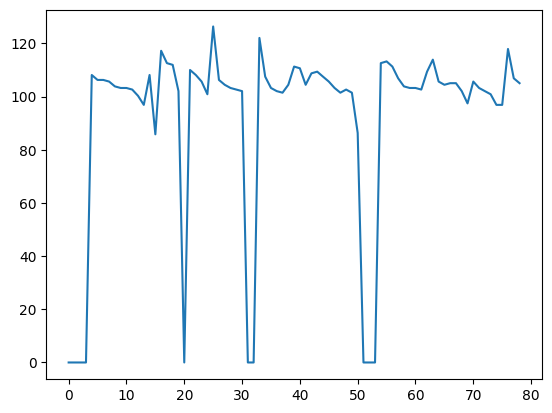

: 

In [ ]:
f0, vid, vpd = librosa.pyin(wav_data, sr = 16000, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'), frame_length=2048, hop_length=512, fill_na=0)
plt.plot(f0)

array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan, 108.73654224, 108.73654224, 106.86851353,
       106.25299618, 105.64102396, 105.64102396, 105.64102396,
       106.25299618, 106.86851353, 106.25299618, 105.03257643,
       103.82617439, 103.22817963, 102.63362907, 102.63362907,
       103.22817963, 103.22817963, 103.22817963, 103.22817963,
       102.63362907, 101.45478129, 100.28947374,  99.13755089,
        95.76056196,  96.8732461 , 103.22817963, 112.57112812,
       102.63362907,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan, 117.89508088, 113.87914162, 110.        ,
       105.64102396, 102.04250286, 102.04250286, 102.04250286,
       110.63722352, 101.45478129,          nan,          nan,
       117.89508088, 110.63722352, 109.36644662, 108.11026584,
       107.48759653, 105.03257643, 103.22817963,  99.13

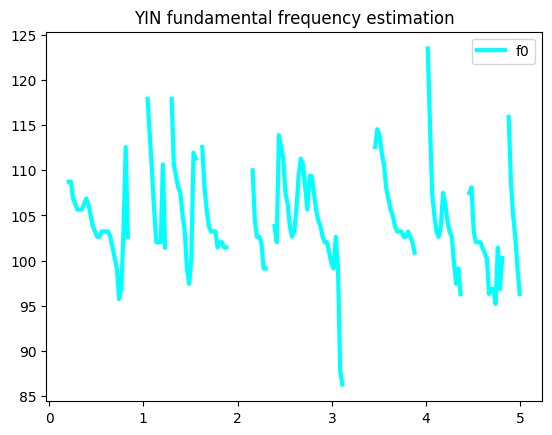

In [ ]:
times = librosa.times_like(f0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set(title='YIN fundamental frequency estimation')
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')
plt.show()

In [ ]:
wav_data ,sr = librosa.load(male_list[0], sr=22050*2, duration = 2.5, res_type='kaiser_fast')
print(wav_data.shape)
wav_data_split = librosa.effects.split(wav_data, top_db=20)
wav_data_split

(110250,)


array([[     0,  18944],
       [ 22016,  41984],
       [ 42496,  45056],
       [ 46080,  70144],
       [ 72704,  86016],
       [ 86528, 110250]])

In [ ]:
SAMPLE_PATH = male_list[0]

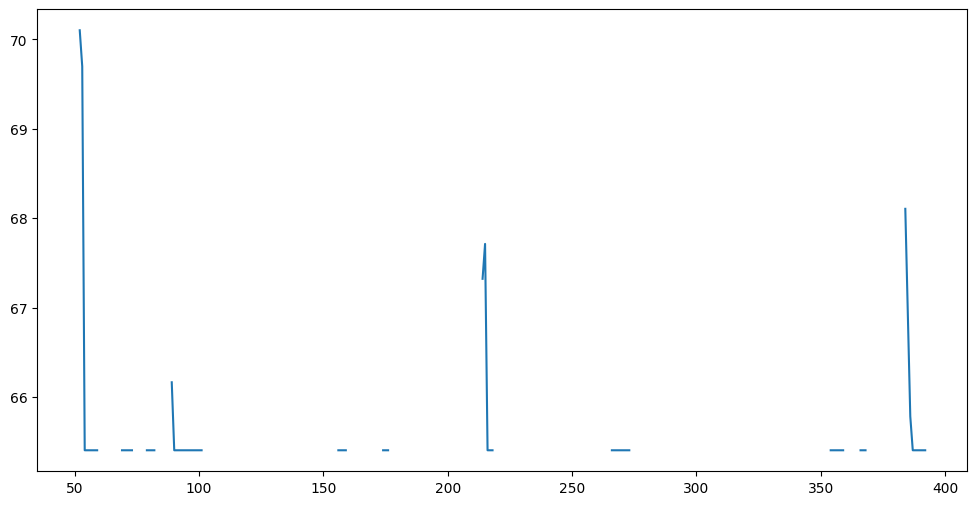

In [ ]:
# combination
y, sr = librosa.load(SAMPLE_PATH, sr=22050*2, res_type='kaiser_fast')
y_split = librosa.effects.split(y, top_db=20)

f0_list = np.array([])

plt.figure(figsize=(12, 6))
for interval in y_split:
    y_interval = y[interval[0]:interval[1]]
    f0, voiced_flag, voiced_probs = librosa.pyin(y_interval, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    f0_list = np.append(f0_list, f0)
plt.plot(f0_list)
plt.show()